In [73]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

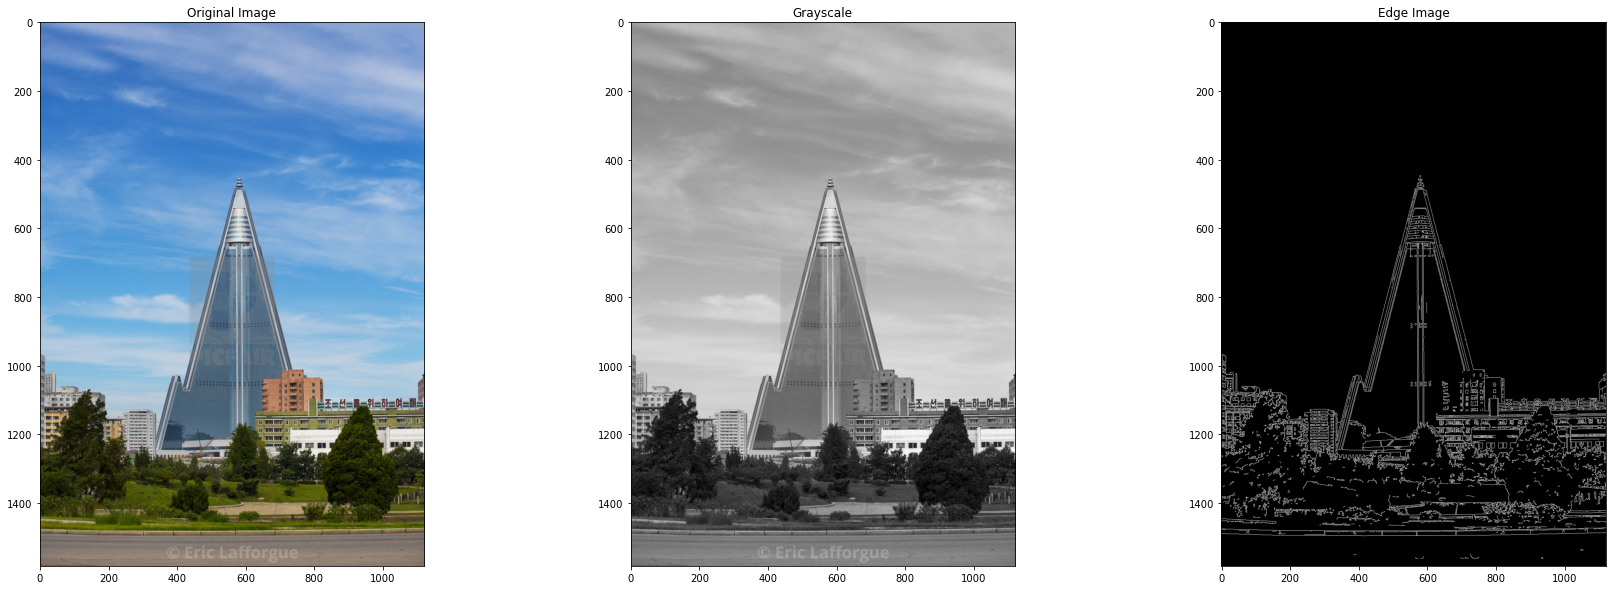

In [74]:
org_img = cv2.imread('image.jpg')

img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)

grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(grayscale,100,200)

plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(grayscale, cmap = 'gray')
plt.title('Grayscale')

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image')

plt.show()

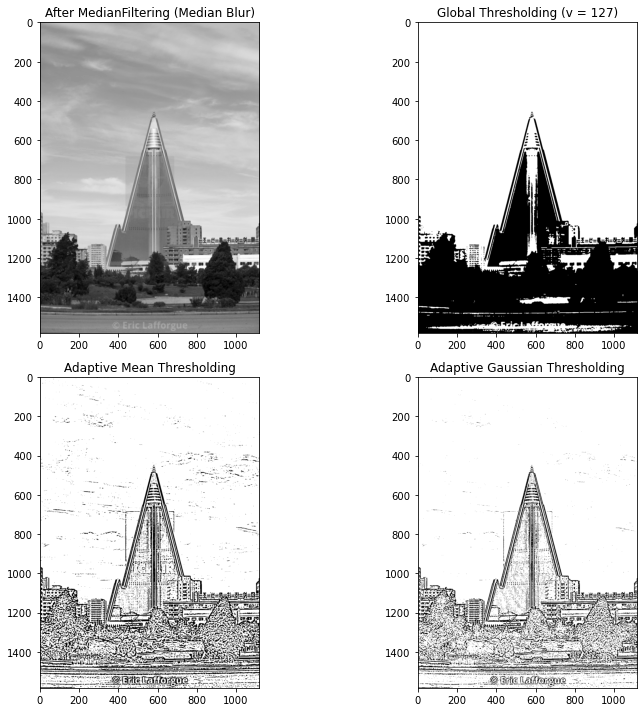

In [75]:
img = cv2.medianBlur(grayscale,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) 

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2) 

titles = ['After MedianFiltering (Median Blur)','Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

plt.figure(figsize=(12,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    

plt.tight_layout()
plt.show()

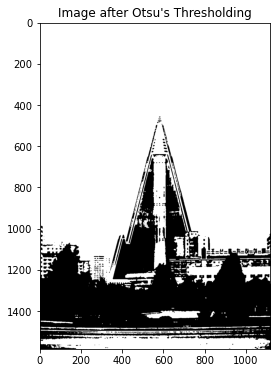

In [40]:
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(6,6))
plt.imshow(th2,'gray')
plt.title("Image after Otsu's Thresholding")
plt.show()

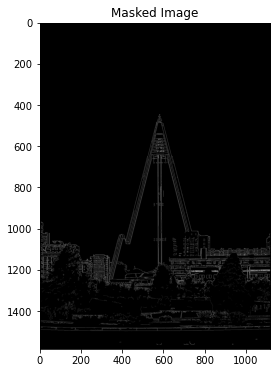

In [72]:
mask = np.zeros(img.shape[:2], dtype="uint8")
masked = cv2.bitwise_and(grayscale, edges)
plt.figure(figsize=(6,6))
plt.imshow(masked, cmap='gray')
plt.title('Masked Image')
plt.show()